In [48]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<Axes: xlabel='x', ylabel='y'>

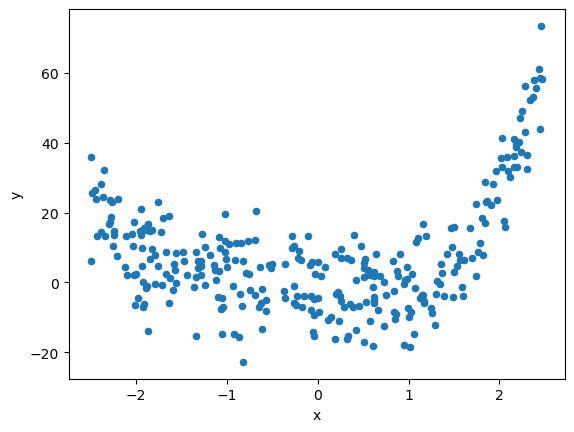

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

X_bc = data_breast_cancer['data'][['mean texture', 'mean symmetry']]
y_bc = data_breast_cancer['target']

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2)



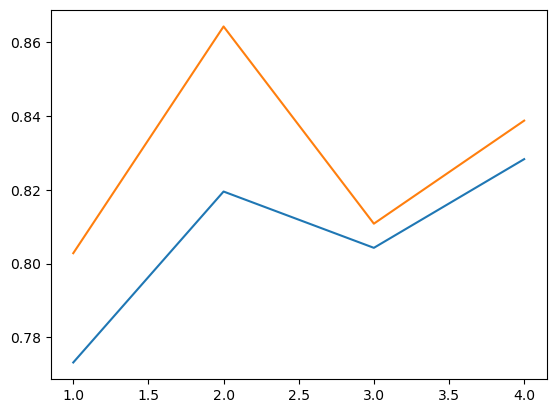

In [51]:
from sklearn.metrics import f1_score

depths = range(1, 5)
f1_train = []
f1_test = []

for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_bc_train, y_bc_train)

    y_bc_train_pred = tree_clf.predict(X_bc_train)
    y_bc_test_pred = tree_clf.predict(X_bc_test)
    
    f1_train.append(f1_score(y_bc_train, y_bc_train_pred))
    f1_test.append(f1_score(y_bc_test, y_bc_test_pred))
   
plt.plot(depths, f1_train, label='train')
plt.plot(depths, f1_test, label='test')
# 3 is the chosen depth from plot

In [52]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_bc_train, y_bc_train)

DecisionTreeClassifier(max_depth=3)

In [53]:
export_graphviz(
    tree_clf,
    out_file='bc.dot',
    feature_names=['mean texture', 'mean symmetry'],
    class_names=['malignant', 'benign'],
    rounded=True,
    filled=True
)

In [54]:
import graphviz

graphviz.render('dot', 'png', filepath='bc.dot', outfile='bc.png')

'bc.png'

In [55]:
import pickle
from sklearn.metrics import accuracy_score

y_bc_train_pred = tree_clf.predict(X_bc_train)
y_bc_test_pred = tree_clf.predict(X_bc_test)

f1_train_for_clf = f1_score(y_bc_train, y_bc_train_pred)
f1_test_for_clf = f1_score(y_bc_test, y_bc_test_pred)

list_for_pickle = [3, f1_train_for_clf, f1_test_for_clf, accuracy_score(y_bc_train, y_bc_train_pred), accuracy_score(y_bc_test, y_bc_test_pred)]

with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(list_for_pickle, f)

    

In [56]:
from sklearn.tree import DecisionTreeRegressor

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(DecisionTreeRegressor(), {'max_depth': range(1, 10)}, cv=5, scoring='neg_mean_squared_error') 
search.fit(X, y)
print(search.best_params_)

{'max_depth': 4}


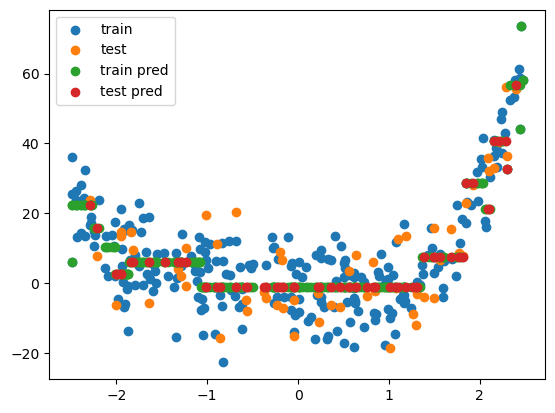

In [58]:
tree_regressor = DecisionTreeRegressor(max_depth=search.best_params_['max_depth'])
tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.scatter(X_train, y_train_pred, label='train pred')
plt.scatter(X_test, y_test_pred, label='test pred')
plt.legend()

In [59]:
export_graphviz(
    tree_regressor,
    out_file='reg.dot',
    feature_names=['x'],
    rounded=True,
    filled=True
)

graphviz.render('dot', 'png', filepath='reg.dot', outfile='reg.png')

'reg.png'

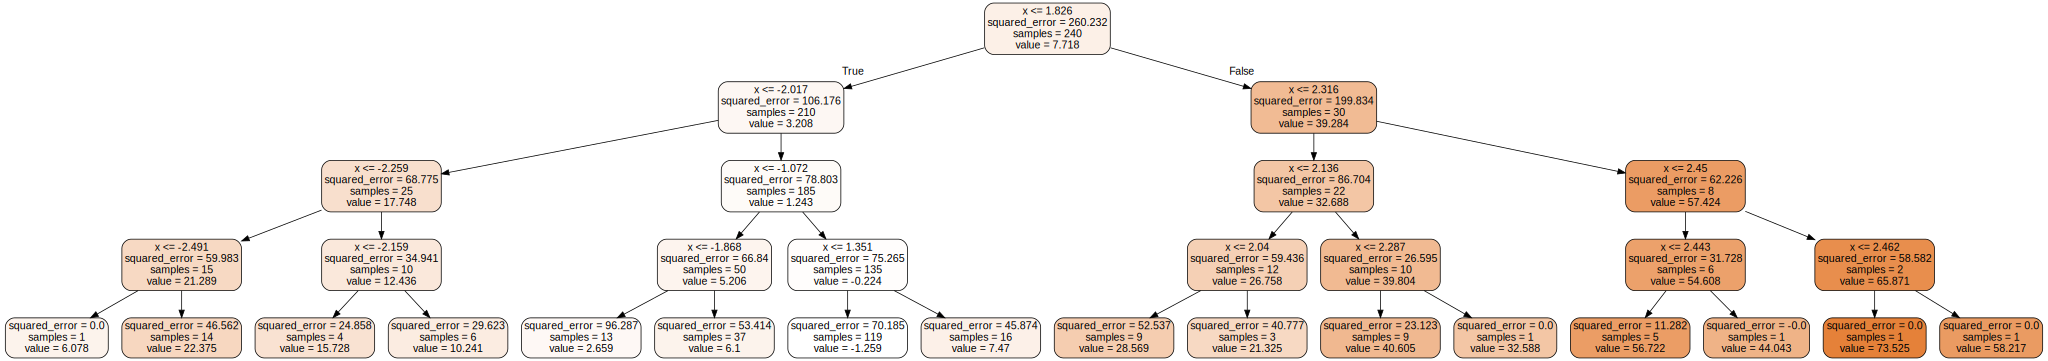

In [60]:
graphviz.Source.from_file('reg.dot')

In [61]:

list_for_pickle_reg = [search.best_params_['max_depth'], mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)]
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(list_for_pickle_reg, f)